In [1]:
import re
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

In [2]:
def read_file(filename):
    with open(filename, "r") as fp:
        lines = fp.readlines()
    data = {}
    for line in lines[1:]:
        tokens = line.strip().split(',')
        method, bs, e2e, requests = tokens[0], int(tokens[1]), tokens[6], tokens[7]
        req_lat = [float(_) for _ in requests.split('+')]
        if 'nan' in e2e:
            req_lat = [0]
        data[(method, bs)] = (e2e, sum(req_lat)/len(req_lat), req_lat)
    return data

In [3]:
data = read_file('shared_prompt_exp_1_32.csv')

In [4]:
data

{('vllm_shared', 800): (' 465.069396438',
  51.51919627829514,
  [49.260166258,
   49.262703882,
   49.265205347,
   49.268563043,
   49.270964542,
   49.273366201,
   49.275559331,
   49.277932937,
   49.282091691,
   49.284942579,
   49.287794049,
   49.2909834,
   49.294469556,
   49.298095934,
   49.301459912,
   49.305263342,
   49.308688845,
   49.313114397,
   49.316699177,
   49.320314394,
   49.324715481,
   49.328368639,
   49.332658297,
   49.336549631,
   49.340259966,
   49.3446223,
   49.348326854,
   49.351843807,
   49.356521791,
   49.360718156,
   49.364993668,
   49.369391648,
   51.421276484,
   51.423416191,
   51.425774378,
   51.427960412,
   51.430771808,
   51.433293991,
   51.43596804,
   51.438339852,
   51.442517177,
   51.445387943,
   51.450153429,
   51.453097553,
   51.456143969,
   51.459378096,
   51.462339031,
   51.465791789,
   51.469021177,
   51.472672796,
   51.476833419,
   51.479698525,
   51.483768519,
   51.487623198,
   51.491583625,
   51.4

In [5]:

olens = [200,400,600,800]
systems = ['parrot_shared', 'vllm_shared',]
hatches = ['', '\\', '/', 'x']
colors = [
"#d73027",
# "#fee090",
# "#91bfdb",
"#4575b4"]
symbols = ['o', 'v']

200 0.07637632567206598
400 0.06707674801440106
600 0.06485936394651041
800 0.06439899534786893


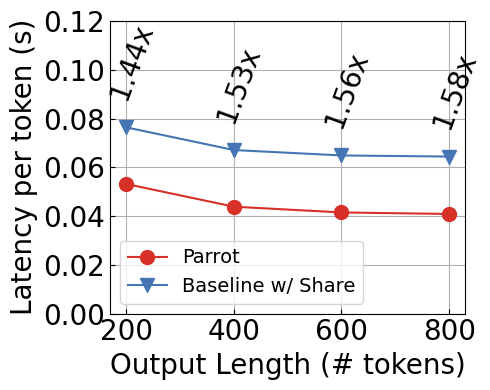

In [14]:

names = {
    'parrot_shared': 'Parrot',
    'vllm_shared': 'Baseline w/ Share'
}

# Generate the chart
x = np.arange(len(olens))
width = 0.25

fig, ax = plt.subplots(1, 1, figsize=(5,4))

plt.grid(True)
rects = []
for i, system in enumerate(systems):
    rect = ax.plot(olens, [data[(system,ol)][1]/ol for ol in olens], markersize=10, marker=symbols[i], color=colors[i], label=names[system],zorder=3) # hatches
    rects.append(rect)

    if system == 'parrot_shared':
        continue
    speedup_values = [data[(system,ol)][1]/data[('parrot_shared',ol)][1] for ol in olens]
    for sid, speedup in enumerate(speedup_values):
        
        height = data[(system, olens[sid])][1]/olens[sid]
        print(olens[sid], height)
        if sid == 4:
            diff = -5
        else:
            diff = 10
        ax.text(olens[sid]+diff, height+0.01,
                '{:.2f}x'.format(speedup),
                ha='center', va='bottom', rotation=70,
                fontsize=20)

# plt.legend(loc='upper left', prop = { "size": 18 },)
ax.tick_params(axis='y', labelsize=20, direction='in')
ax.tick_params(axis='x', labelsize=20, direction='in')
ax.set_xlabel('Output Length (# tokens)', fontsize=20)
ax.set_ylabel('Latency per token (s)', fontsize=20)
plt.legend(loc='lower left', prop = { "size": 14 }) #, bbox_to_anchor= (0., 0.97))
plt.xticks(olens)
plt.yticks([0,0.02,0.04, 0.06, 0.08, 0.1, 0.12])
plt.ylim([0,0.12])

plt.tight_layout()
plt.savefig('share_olen_bs32.pdf')